In [1]:
import numpy as np # 
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [6]:
mi = pd.read_csv('MI10.txt',error_bad_lines=False)

In [7]:
mi = [x.strip() for x in mi.x]
mi = [x for x in mi if x]
mi[0:10]

["Great product by redmi, but I request to redmi please don't make fake sale",
 "FNever buy chip quality battery drain issues don't buy",
 "Previous owner of Redmi 7 2gb 32gb\nRedmi Note 10 4gb 64gb was blazing fast\n\nIf you aren't able to buy this wait till Xiaomi release the same in poco with 6gb ram for the same price, like they did with Redmi power with a downgrade in camera, They won't remove the 48mp camera, They may decrease or remove the remaining cameras in poco version of resmi note 10\n\nAbout Amazon sale I logged in to amazon.in in my pc and clicked on join wait list around 12:02, then opened the app and booked the phone I was in queue for almost 20 to 25 minutes, the next step was payment which was a pain in the head, no COD, Note: only upi ids with number@ are accepted, I added a card Note: Check if ecommerce payments is enabled for your card\n\nIn the allocated 15 minutes the order was booked but payment failed, thankfully I was allowed to pay again\n\nAlso while I was 

In [8]:
nlp = spacy.load('en_core_web_md')
one_block = mi[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [9]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Previous ADJ
owner NOUN
of ADP
Redmi PROPN
7 NUM
2 NUM
gb NOUN
32 NUM
gb NOUN

 SPACE
Redmi PROPN
Note PROPN
10 NUM
4 NUM
gb NUM
64 NUM
gb NOUN
was AUX
blazing VERB
fast ADJ


In [10]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['are', 'buy', 'wait', 'release', 'gb', 'ram', 'price', 'did', 'power', 'downgrade', 'camera', 'remove', 'camera', 'decrease', 'remove', 'remaining', 'cameras', 'version', 'resmi', 'note']


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,gb,4
1,note,3
2,phone,3
3,buy,2
4,wait,2
5,price,2
6,camera,2
7,remove,2
8,pc,2
9,booked,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

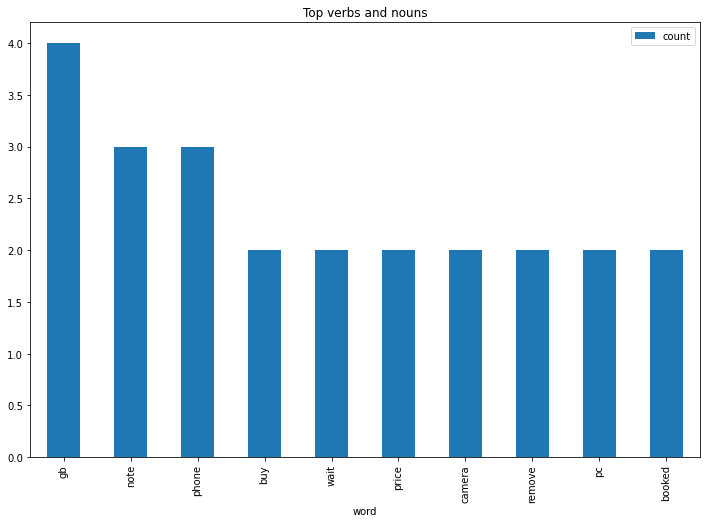

In [13]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [14]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [15]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [17]:
from nltk import tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

sentences = tokenize.sent_tokenize(" ".join(mi))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SmartLine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SmartLine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['This 6.43-inch display with the Full HD Plus resolution is really good along with a punch-hole selfie camera that offers a seamless user experience.',
 'The brightness can go up 1100 nits peak so it is definitely not a difficult thing to use it under sunlight.',
 'Xiaomi provided this model with the Widevine L1 DRM certification support for this mobile.',
 "So, playing HD videos on an ott platform won't be an issue.",
 'Z-axis haptic motor used in this mobile throws more realistic vibrations while playing games.',
 'I tried it extensively with a couple of games, the experience was really satisfying.',
 'Kudos to Xiaomi for throwing in all the sensors on this mobile especially for not giving up on the remote control sensor.',
 'This mobile comes with a lot of preloaded apps like Facebook, LinkedIn, MI remote, MI credit, MI Store, MI pay, share m, etc.',
 'Out of these, you can uninstall a couple of apps and you have to live with the remaining apps for the rest of the life.',
 'This mo

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"Great product by redmi, but I request to redmi..."
1,This mobile phone is definitely going to be an...
2,It has an almost 1mm protruding camera module ...
3,I have bought aqua-green color which has these...
4,The colors are up to your personal preferences.
...,...
106,Whether company has even bothered to check the...
107,Simply have launched in the market making peop...
108,Why fooling people degrading quality with ever...
109,camera below average performance also average.


In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [20]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [23]:
calculate_sentiment(text = 'phone')

0

In [24]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [25]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    284
1     20
2     14
3     11
4      8
5     24
6     21
7     14
8     12
9     14
Name: word_count, dtype: int64

In [26]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
97,I Agree That This Is A Very Good Mobile.,4,9
104,If you want good battery service.,4,6
73,Iam not big fan of #MI before this phone.,4,9
31,In shot very GOOD PHONE I pay 100rs extra for ...,5,35
19,Battery performance is superb coz of 33w charg...,5,9
29,I use redmi note 10 for 1 day...And review it\...,6,48
18,Best phone under 14000.Camera quality is also ...,6,8
32,There is another variant that comes in 12k you...,7,44
75,Battery was best overall this is nice phone fo...,11,32
52,check wether both the speakers are working or ...,14,89


In [27]:
sent_df['sentiment_value'].describe()

count    111.000000
mean       0.450450
std        3.056257
min      -12.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [28]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,This mobile phone is definitely going to be an...,0,20
2,It has an almost 1mm protruding camera module ...,0,14
3,I have bought aqua-green color which has these...,0,11
4,The colors are up to your personal preferences.,0,8
6,The brightness can go up 1100 nits peak so it ...,0,21


In [30]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
52,check wether both the speakers are working or ...,14,89
75,Battery was best overall this is nice phone fo...,11,32


In [31]:
sent_df['index']=range(0,len(sent_df))

C:\Users\SmartLine\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

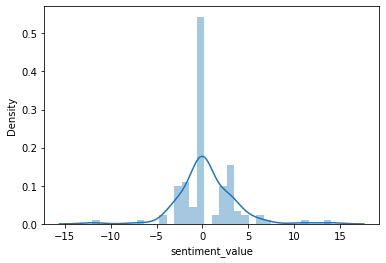

In [32]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

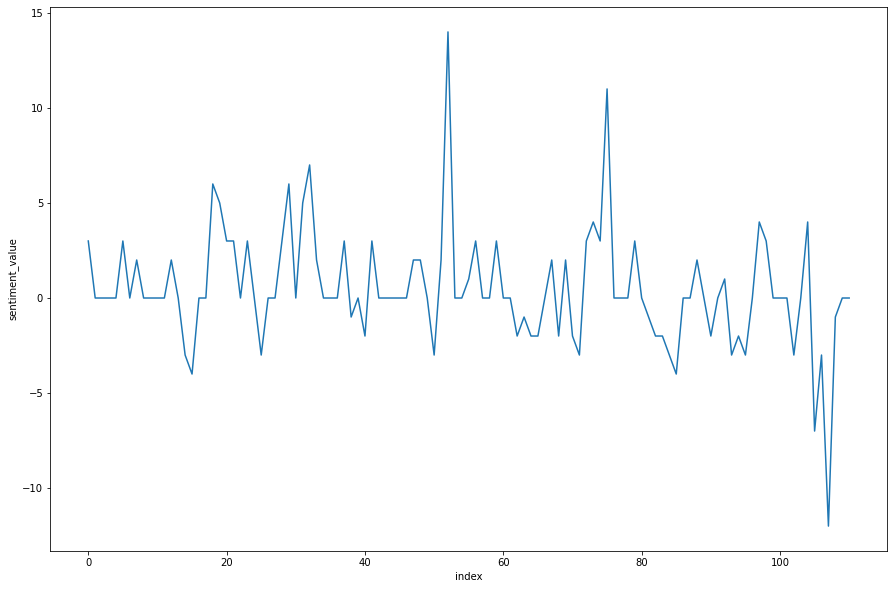

In [33]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

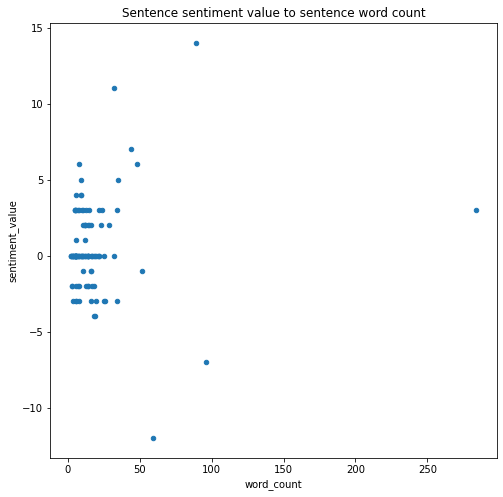

In [34]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')